# **AUTO ENCODER ON MNIST**

In [8]:
import keras
from  keras.datasets import mnist
import numpy as NP
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense


In [2]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_TRAIN[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

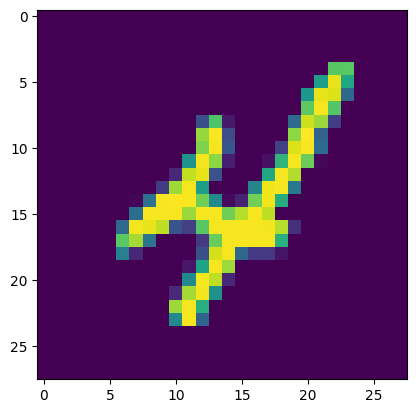

In [4]:
plt.imshow(X_TRAIN[9])

In [5]:
X_TRAIN = NP.reshape(X_TRAIN,(60000,784))
X_TEST = NP.reshape(X_TEST,(10000,784))
X_TRAIN = X_TRAIN/255
X_TEST = X_TEST/255

In [6]:
X_TRAIN[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
print("Shape of Train Data: {}".format(X_TRAIN.shape))
print("Shape of Train Data: {}".format(X_TEST.shape))


Shape of Train Data: (60000, 784)
Shape of Train Data: (10000, 784)


In [9]:
encoding_dim = 32
input_img = Input(shape=(784,))


In [10]:
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


In [11]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


In [12]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_TRAIN,X_TRAIN,epochs=50,batch_size=128,shuffle=True,
                validation_data=(X_TEST,X_TEST))


Epoch 1/50
469/469 [==============================] - 5s 7ms/step - loss: 0.2769 - val_loss: 0.2611
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2478 - val_loss: 0.2400
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2264 - val_loss: 0.2098
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1972 - val_loss: 0.1838
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1762 - val_loss: 0.1680
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1631 - val_loss: 0.1560
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1520 - val_loss: 0.1454
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1431 - val_loss: 0.1388
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1367 - val_loss: 0.1327
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1318 - val_loss: 0.1278

In [13]:
encoded_imgs = autoencoder.predict(X_TEST)

313/313 [==============================] - 1s 2ms/step


TEST DATA AS INPUT:


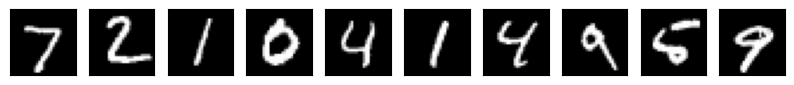

In [14]:
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


reconstructed DATA AS outPUT:


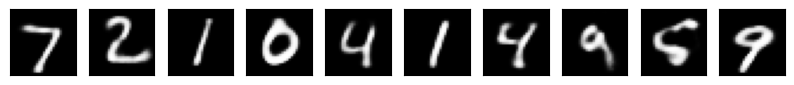

In [15]:
n = 10  # how many digits we will display
print("reconstructed DATA AS outPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
# display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
